<h1>Custom Image Classification</h1>

In the real world the data we are using will not be nicely formatted as part of a library, it is likely that we will be creating our own datasets. In this example we are exploring a realistic binary classification problem.

Let's explore what its like to work with a more realistic data set. The dataset has been taken from Kaggle and there are 12,500 images of both cats and dogs (this is a large dataset).<br/><br/>
<h2>Visualising Image Data</h2>

In [5]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [7]:
cat1 = cv2.imread('./CATS_DOGS/train/CAT/1.jpg')
cat1 = cv2.cvtColor(cat1,cv2.COLOR_BGR2RGB)

In [8]:
type(cat1)

numpy.ndarray

In [9]:
cat1.shape

(281, 300, 3)

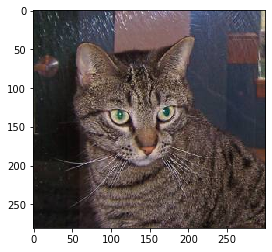

In [10]:
plt.imshow(cat1)

In [15]:
dog1 = cv2.imread('./CATS_DOGS/train/Dog/1.jpg')
dog1 = cv2.cvtColor(dog1,cv2.COLOR_BGR2RGB)

In [16]:
dog1.shape

(500, 327, 3)

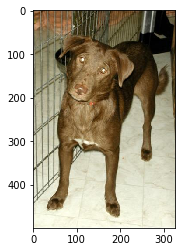

In [17]:
plt.imshow(dog1)

<h2>Preparing the Data for the model</h2>

There is too much data for us to read all at once in memory. We can use some built in Keras functions to automatically process the data, generate a flow of batches from a directory and manipulate the images.

<b>Image Manipulation</b>

It is standard practice to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that the data set doesn't represent. We can use the **ImageDataGenerator** to do this automatically.

In [18]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [19]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

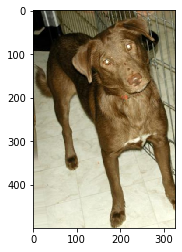

In [20]:
plt.imshow(image_gen.random_transform(dog1))

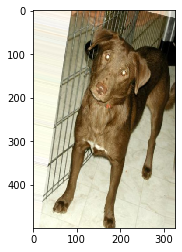

In [21]:
plt.imshow(image_gen.random_transform(dog1))

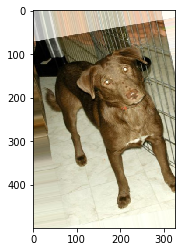

In [22]:
plt.imshow(image_gen.random_transform(dog1))

<b>Manipulating images automatically from directory</b>

In order to use .flow_from_directory, you must organise the images in sub-directories. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [23]:
image_gen.flow_from_directory('./CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [24]:
image_gen.flow_from_directory('./CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


<b>Resizing Images</b>

Keras can resize all the images to 150 pixels by 150 pixels once they've been manipulated so they are all a standard size for analysis.

In [25]:
# width,height,channels
image_shape = (150,150,3)

<h2>Building the Model</h2>

In [26]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

<h2>Training the Model</h2>

In [29]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('./CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [30]:
test_image_gen = image_gen.flow_from_directory('./CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [31]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)


Epoch 1/100
150/150 [==============================] - 89s 593ms/step - loss: 0.6959 - accuracy: 0.5021 - val_loss: 0.6815 - val_accuracy: 0.5521
Epoch 2/100
150/150 [==============================] - 93s 618ms/step - loss: 0.6852 - accuracy: 0.5537 - val_loss: 0.6853 - val_accuracy: 0.5781
Epoch 3/100
150/150 [==============================] - 94s 625ms/step - loss: 0.6853 - accuracy: 0.5558 - val_loss: 0.6453 - val_accuracy: 0.5833
Epoch 4/100
150/150 [==============================] - 94s 627ms/step - loss: 0.6828 - accuracy: 0.5792 - val_loss: 0.7041 - val_accuracy: 0.5208
Epoch 5/100
150/150 [==============================] - 84s 557ms/step - loss: 0.6797 - accuracy: 0.5650 - val_loss: 0.6918 - val_accuracy: 0.5573
Epoch 6/100
150/150 [==============================] - 85s 565ms/step - loss: 0.6653 - accuracy: 0.6010 - val_loss: 0.6829 - val_accuracy: 0.6302
Epoch 7/100
150/150 [==============================] - 83s 553ms/step - loss: 0.6762 - accuracy: 0.5850 - val_loss: 0.6083 

150/150 [==============================] - 57s 378ms/step - loss: 0.5290 - accuracy: 0.7404 - val_loss: 0.3252 - val_accuracy: 0.7240
Epoch 56/100
150/150 [==============================] - 58s 387ms/step - loss: 0.5242 - accuracy: 0.7354 - val_loss: 0.6287 - val_accuracy: 0.6979
Epoch 57/100
150/150 [==============================] - 60s 398ms/step - loss: 0.5071 - accuracy: 0.7458 - val_loss: 0.5471 - val_accuracy: 0.7865
Epoch 58/100
150/150 [==============================] - 59s 393ms/step - loss: 0.4939 - accuracy: 0.7641 - val_loss: 0.4558 - val_accuracy: 0.7604
Epoch 59/100
150/150 [==============================] - 60s 401ms/step - loss: 0.5203 - accuracy: 0.7600 - val_loss: 0.3234 - val_accuracy: 0.7604
Epoch 60/100
150/150 [==============================] - 59s 390ms/step - loss: 0.5170 - accuracy: 0.7525 - val_loss: 0.3841 - val_accuracy: 0.8229
Epoch 61/100
150/150 [==============================] - 62s 412ms/step - loss: 0.5200 - accuracy: 0.7487 - val_loss: 0.4008 - val_a

In [34]:
model.save('cat_dog_classifier100ep-150st.h5')

<h2>Measuring the Model Results</h2>

In [38]:
results.history['val_accuracy']

[0.5520833134651184,
 0.578125,
 0.5833333134651184,
 0.5208333134651184,
 0.5572916865348816,
 0.6302083134651184,
 0.59375,
 0.5677083134651184,
 0.640625,
 0.59375,
 0.59375,
 0.5833333134651184,
 0.5625,
 0.671875,
 0.625,
 0.65625,
 0.625,
 0.6666666865348816,
 0.6822916865348816,
 0.6354166865348816,
 0.6979166865348816,
 0.609375,
 0.6197916865348816,
 0.6614583134651184,
 0.7135416865348816,
 0.7239583134651184,
 0.7083333134651184,
 0.7447916865348816,
 0.7083333134651184,
 0.6979166865348816,
 0.703125,
 0.71875,
 0.7058823704719543,
 0.6614583134651184,
 0.6770833134651184,
 0.765625,
 0.734375,
 0.71875,
 0.7083333134651184,
 0.7552083134651184,
 0.7604166865348816,
 0.7135416865348816,
 0.7083333134651184,
 0.7395833134651184,
 0.6927083134651184,
 0.7239583134651184,
 0.71875,
 0.7447916865348816,
 0.75,
 0.75,
 0.7447916865348816,
 0.7604166865348816,
 0.7239583134651184,
 0.7447916865348816,
 0.7239583134651184,
 0.6979166865348816,
 0.7864583134651184,
 0.7604166865348

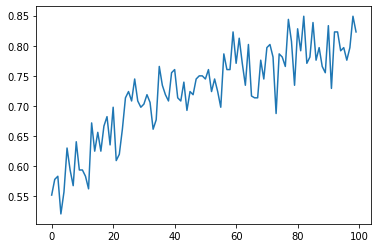

In [39]:
plt.plot(results.history['val_accuracy'])

<h2>Predicting</h2>

In [68]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [85]:
import numpy as np
from keras.preprocessing import image

cat_imgfile = './cattest1.jpg'

catimg = image.load_img(cat_imgfile, target_size=(150, 150))

catimg = image.img_to_array(catimg)

catimg = np.expand_dims(catimg, axis=0)
catimg= catimg/255

In [86]:
prediction_prob = model.predict(catimg)

In [87]:
# Output prediction
print(f'Probability that image is a Cat is: {prediction_prob} ')

Probability that image is a Cat is: [[0.57282585]] 


In [88]:
import numpy as np
from keras.preprocessing import image

cat_imgfile = './cattest2.jpg'

catimg = image.load_img(cat_imgfile, target_size=(150, 150))

catimg = image.img_to_array(catimg)

catimg = np.expand_dims(catimg, axis=0)
catimg= catimg/255
prediction_prob = model.predict(catimg)
print(f'Probability that image is a Cat is: {prediction_prob} ')

Probability that image is a Cat is: [[0.7280267]] 


<h1>Challenge: Try a lower number of Epochs</h1><br/>
It will take less time to run but the performance of the network may not be as effective.<br/> 
Try passing different images in for prediction, are there any surprises?<br/>
There are many binary classification datasets on Kaggle, try this notebook with a new dataset.